In [12]:
# Lib use
import numpy as np
import matplotlib.pyplot as plt
from math import cos, log

In [13]:
# Function to call
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("Function must have opposite signs at interval endpoints")

    iterations = 0
    errors = []

    while (b - a) / 2 > tol and iterations < max_iter:
        c = (a + b) / 2
        error = (b - a) / 2
        errors.append(error)

        if f(c) == 0:
            return c, iterations, errors
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c

        iterations += 1

    root = (a + b) / 2
    return root, iterations, errors

def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    iterations = 0
    errors = []

    while abs(x1 - x0) > tol and iterations < max_iter:
        if f(x1) - f(x0) == 0:
            raise ValueError("Division by zero in secant method")

        x_new = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        error = abs(x_new - x1)
        errors.append(error)

        x0 = x1
        x1 = x_new
        iterations += 1

        if abs(f(x1)) < tol:
            break

    return x1, iterations, errors

def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    iterations = 0
    errors = []

    while iterations < max_iter:
        if df(x) == 0:
            raise ValueError("Derivative is zero in Newton-Raphson method")

        x_new = x - f(x) / df(x)
        error = abs(x_new - x)
        errors.append(error)

        if error < tol or abs(f(x_new)) < tol:
            x = x_new
            break

        x = x_new
        iterations += 1

    return x, iterations, errors

In [14]:
# Part 1: Bisection Method for f(x) = x^3 - x - 2
def f1(x):
    return x**3 - x - 2

print("Part 1: Bisection Method")
a, b = 1, 2
root_bisection, iterations_bisection, errors_bisection = bisection_method(f1, a, b)
print(f"Root: {root_bisection}")
print(f"Number of iterations: {iterations_bisection}")
print(f"Final error: {errors_bisection[-1]}")

Part 1: Bisection Method
Root: 1.5213804244995117
Number of iterations: 19
Final error: 1.9073486328125e-06


In [15]:
# Part 2: Secant Method for f(x) = x^2 - 2
def f2(x):
    return x**2 - 2

print("Part 2: Secant Method")
x0, x1 = 1, 2
root_secant, iterations_secant, errors_secant = secant_method(f2, x0, x1)
print(f"Root: {root_secant}")
print(f"Number of iterations: {iterations_secant}")
print(f"Final error: {errors_secant[-1]}")

Part 2: Secant Method
Root: 1.4142135620573204
Number of iterations: 5
Final error: 2.12358245033073e-06


In [16]:
# Part 3: Newton-Raphson Method for f(x) = cos(x) - x
def f3(x):
    return cos(x) - x

def df3(x):
    return -np.sin(x) - 1

print("Part 3: Newton-Raphson Method")
x0 = 0.5
root_newton, iterations_newton, errors_newton = newton_raphson(f3, df3, x0)
print(f"Root: {root_newton}")
print(f"Number of iterations: {iterations_newton}")
print(f"Final error: {errors_newton[-1]}")

Part 3: Newton-Raphson Method
Root: 0.7390851339208068
Number of iterations: 2
Final error: 5.653222907242572e-05


Part 4: Comparative Analysis
Method 		 Root 		 Iterations 	 Final Error
Bisection 	 1.5213804245 	 19 		 0.0000019073
Secant 		 1.5213797080 	 6 		 0.0000033913
Newton-Raphson 	 1.5213798060 	 1 		 0.0003593245


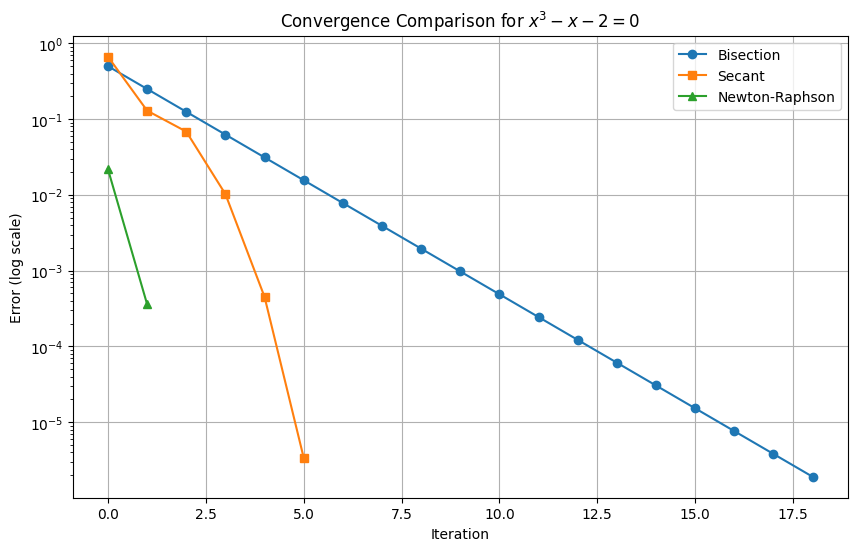

In [17]:
def f1(x):
    return x**3 - x - 2

def df1(x):
    return 3*x**2 - 1

print("Part 4: Comparative Analysis")
print("Method \t\t Root \t\t Iterations \t Final Error")

# Bisection method
a, b = 1, 2
root_bisection, iterations_bisection, errors_bisection = bisection_method(f1, a, b)
print(f"Bisection \t {root_bisection:.10f} \t {iterations_bisection} \t\t {errors_bisection[-1]:.10f}")

# Secant method for f1
x0, x1 = 1, 2
root_secant_f1, iterations_secant_f1, errors_secant_f1 = secant_method(f1, x0, x1)
print(f"Secant \t\t {root_secant_f1:.10f} \t {iterations_secant_f1} \t\t {errors_secant_f1[-1]:.10f}")

# Newton-Raphson method for f1
x0 = 1.5
root_newton_f1, iterations_newton_f1, errors_newton_f1 = newton_raphson(f1, df1, x0)
print(f"Newton-Raphson \t {root_newton_f1:.10f} \t {iterations_newton_f1} \t\t {errors_newton_f1[-1]:.10f}")

# Plot the convergence rates
plt.figure(figsize=(10, 6))
plt.semilogy(range(len(errors_bisection)), errors_bisection, 'o-', label='Bisection')
plt.semilogy(range(len(errors_secant_f1)), errors_secant_f1, 's-', label='Secant')
plt.semilogy(range(len(errors_newton_f1)), errors_newton_f1, '^-', label='Newton-Raphson')
plt.title('Convergence Comparison for $x^3 - x - 2 = 0$')
plt.xlabel('Iteration')
plt.ylabel('Error (log scale)')
plt.legend()
plt.grid(True)
plt.show()

Part 5: Solving ln(x) + x^2 - 4 = 0


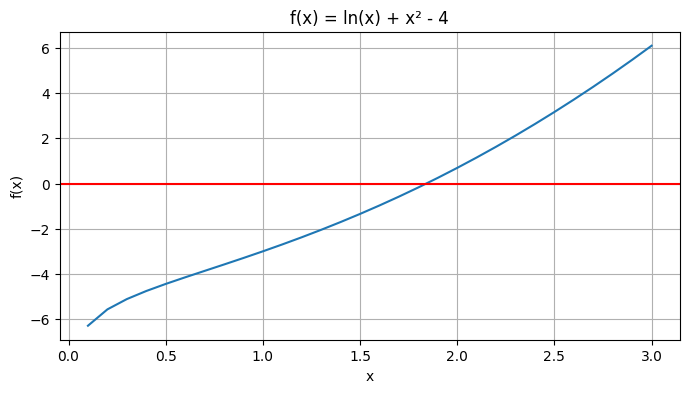


Bisection Method:
Root: 1.8410978317260742
Number of iterations: 19
Final error: 1.9073486328125e-06

Newton-Raphson Method:
Root: 1.8410970619240907
Number of iterations: 2
Final error: 0.0001312194704783387


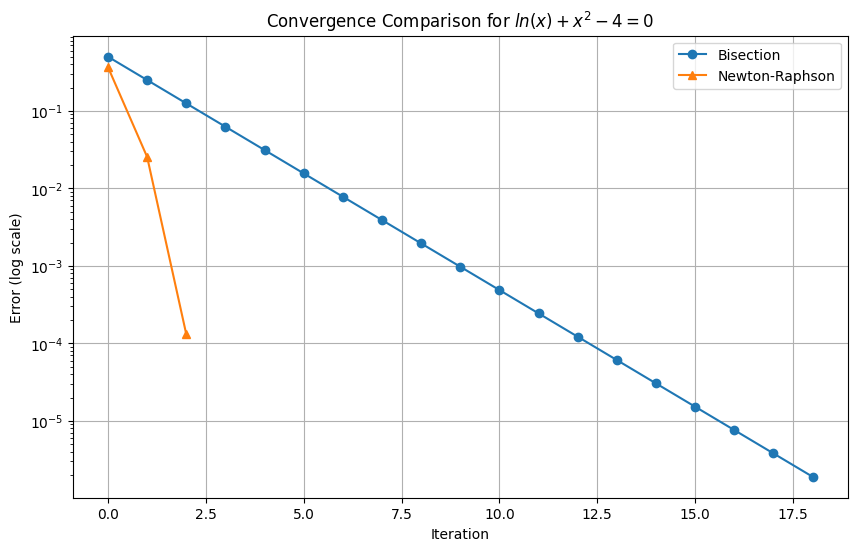

In [18]:
# Part 5: Solve f(x) = ln(x) + x^2 - 4 = 0 using two methods
def f5(x):
    return log(x) + x**2 - 4

def df5(x):
    return 1/x + 2*x

print("Part 5: Solving ln(x) + x^2 - 4 = 0")

x_vals = np.linspace(0.1, 3, 30)
y_vals = [f5(x) for x in x_vals]

plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.title('f(x) = ln(x) + x² - 4')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# Using Bisection method
a, b = 1, 2
if f5(a) * f5(b) < 0:
    print("\nBisection Method:")
    root_bisection_f5, iterations_bisection_f5, errors_bisection_f5 = bisection_method(f5, a, b)
    print(f"Root: {root_bisection_f5}")
    print(f"Number of iterations: {iterations_bisection_f5}")
    print(f"Final error: {errors_bisection_f5[-1]}")
else:
    print("\nBisection Method:")
    print("Cannot use bisection method with initial interval [1, 2] as f(a) and f(b) don't have opposite signs")

    # Search for a valid interval
    for i in range(1, 20):
        a, b = i*0.1, (i+1)*0.1
        if f5(a) * f5(b) < 0:
            print(f"Found valid interval: [{a}, {b}]")
            root_bisection_f5, iterations_bisection_f5, errors_bisection_f5 = bisection_method(f5, a, b)
            print(f"Root: {root_bisection_f5}")
            print(f"Number of iterations: {iterations_bisection_f5}")
            print(f"Final error: {errors_bisection_f5[-1]}")
            break

# Using Newton-Raphson method
x0 = 1.5  # Initial guess
print("\nNewton-Raphson Method:")
root_newton_f5, iterations_newton_f5, errors_newton_f5 = newton_raphson(f5, df5, x0)
print(f"Root: {root_newton_f5}")
print(f"Number of iterations: {iterations_newton_f5}")
print(f"Final error: {errors_newton_f5[-1]}")

# Plot the convergence comparison
plt.figure(figsize=(10, 6))
try:
    plt.semilogy(range(len(errors_bisection_f5)), errors_bisection_f5, 'o-', label='Bisection')
except:
    pass
plt.semilogy(range(len(errors_newton_f5)), errors_newton_f5, '^-', label='Newton-Raphson')
plt.title('Convergence Comparison for $ln(x) + x^2 - 4 = 0$')
plt.xlabel('Iteration')
plt.ylabel('Error (log scale)')
plt.legend()
plt.grid(True)
plt.show()